In [2]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('all_results.csv')

In [4]:
df.head()

,machine,limits,benchmark,lower_is_better,repetition,result
0,issdm-0,with_limits,stressng-matrix-add,False,1,46366.692577
1,issdm-0,with_limits,stressng-matrix-div,False,1,31473.311846
2,issdm-0,with_limits,stressng-matrix-frobenius,False,1,47968.719911
3,issdm-0,with_limits,stressng-matrix-mult,False,1,91722.291168
4,issdm-0,with_limits,stressng-matrix-prod,False,1,396.526948


In [8]:
df['machine'].unique()

array(['issdm-0', 'issdm-1', 'issdm-11', 'issdm-14', 'issdm-16',
       'issdm-17', 'issdm-24', 'issdm-27', 'issdm-29', 'issdm-3',
       'issdm-34', 'issdm-40', 'issdm-6'], dtype=object)

In [6]:
df['benchmark'].unique()

array(['stressng-matrix-add', 'stressng-matrix-div',
       'stressng-matrix-frobenius', 'stressng-matrix-mult',
       'stressng-matrix-prod', 'stressng-matrix-sub',
       'stressng-matrix-hadamard', 'stressng-matrix-trans'], dtype=object)

In [28]:
subdf = df[df['benchmark'] == 'stressng-matrix-add']

In [43]:
subdf

,machine,limits,benchmark,lower_is_better,repetition,result,result_normalized
0,issdm-0,with_limits,stressng-matrix-add,False,1,46366.692577,-0.365592
8,issdm-1,with_limits,stressng-matrix-add,False,1,56393.107895,0.448417
16,issdm-11,with_limits,stressng-matrix-add,False,1,52127.957669,0.102144
24,issdm-14,with_limits,stressng-matrix-add,False,1,47635.878735,-0.262552
32,issdm-16,with_limits,stressng-matrix-add,False,1,47426.202080,-0.279574
40,issdm-17,with_limits,stressng-matrix-add,False,1,51892.723139,0.083047
48,issdm-24,with_limits,stressng-matrix-add,False,1,46205.820225,-0.378653
56,issdm-27,with_limits,stressng-matrix-add,False,1,56040.586461,0.419797
64,issdm-29,with_limits,stressng-matrix-add,False,1,46212.505506,-0.378110
72,issdm-3,with_limits,stressng-matrix-add,False,1,55131.373799,0.345981


/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


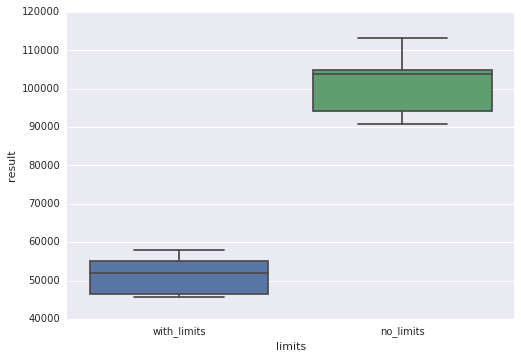

In [44]:
sns.boxplot(subdf['result'], groupby=subdf['limits'])

In [34]:
subdf['result_normalized'] = subdf.apply(
  lambda x:
    (x['result'] - subdf[subdf['limits'] == x['limits']]['result'].mean()) /
    (subdf[subdf['limits'] == x['limits']]['result'].max() -
     subdf[subdf['limits'] == x['limits']]['result'].min()),
  axis=1
)


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


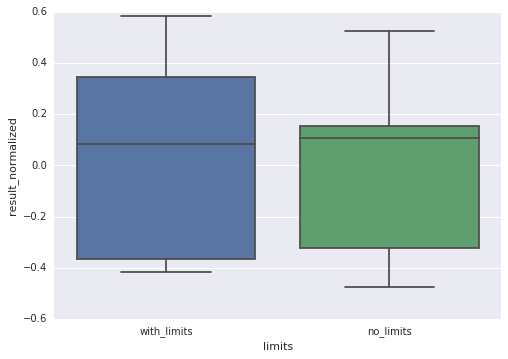

In [41]:
sns.boxplot(subdf['result_normalized'], groupby=subdf['limits'])